# Vancouver Real Estate

Brandon Tu

May 3, 2021

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Background" data-toc-modified-id="Project-Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Background</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Thought-Process" data-toc-modified-id="Thought-Process-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Thought Process</a></span></li><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Dictionary</a></span></li></ul></li><li><span><a href="#Import-Packages-and-Libraries" data-toc-modified-id="Import-Packages-and-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages and Libraries</a></span></li><li><span><a href="#Web-Scraping-Data" data-toc-modified-id="Web-Scraping-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Web Scraping Data</a></span></li><li><span><a href="#Cleaning-&amp;-EDA" data-toc-modified-id="Cleaning-&amp;-EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#Removing-Missing-Values-and-Duplicates" data-toc-modified-id="Removing-Missing-Values-and-Duplicates-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Removing Missing Values and Duplicates</a></span></li><li><span><a href="#Splitting-Bathrooms-Column-into-Full-&amp;-Half-Bathrooms" data-toc-modified-id="Splitting-Bathrooms-Column-into-Full-&amp;-Half-Bathrooms-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Splitting Bathrooms Column into Full &amp; Half Bathrooms</a></span></li><li><span><a href="#Changing-Datatypes" data-toc-modified-id="Changing-Datatypes-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Changing Datatypes</a></span></li><li><span><a href="#Visual-Analysis" data-toc-modified-id="Visual-Analysis-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Visual Analysis</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-4.4.1.1"><span class="toc-item-num">4.4.1.1&nbsp;&nbsp;</span>Numerical Features</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Project Background

### Overview

This project was created for the purpose of using web scraping to obtain data on real estate listings in Vancouver with the ultimate goal of creating an application and the intention to help real estate investors and home owners find possible investments that are underpriced. With the insanely high cost of housing in Vancouver, being able to find cheaper housing is very valuable for both home owners and real estate investors; such properties are difficult to find and can provide great return on investments for investors or allow renters with lower income to purchase their first property.

### Thought Process
1. I will start by using the available information off of a real estate website containing listings from Lower Mainland of British Columbia, [Remax](https://www.remax.ca/bc/vancouver-real-estate?v=1), and will build out the necessary framework to scrape and clean the information off of the website. 
2. Build a package to automate the scraping of the information.
3. Obtain information on the average price of a property based on bedrooms, property size and other characteristics of the property to for usage in determining whether a listing is considered above the average or below the average price.
4. Include an interactive population density map to help visualize where the listings are situated and the population in that area. This is important for both investors and home owners as investors may want to rent out these properties or sell these properties after upgrading/renovating the property, and home owners may want to know how busy the neighbourhood in consideration of their personal and/or family interests.
5. Turn the entire process into an application that can use these functions and visualize the map.
6. Increase the area that the application will consider.


### Data Dictionary

The information that I want to obtain from the website are included below with a description.

Column Name   | Datatype     | Description
------------- | -------------| -------------
Address | str | Address of the property
URL | str | URL to find the listing
property_size | int | The size of the property in square feet
description | str | Description of the property provided on the website
price | int | Price of the property
bedrooms | int | Number of Bedrooms
bathrooms | int | Number of Bathrooms
property_type | str | Type of property (house, condo, etc.)
style | str | The style of the property (ex. 2 storey, Townhouse, etc.)
subdivision | str | The neighbourhood of which the property belongs

---

## Import Packages and Libraries

Since I want to perform web scraping in this project, I will use the Selenium and BeautifulSoup libraries to obtain my data.

In [1]:
# Import Packages and Libraries

# Fundamentals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import time

# Web Scraping
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

---

## Web Scraping Data

For web scraping, I will disable many functions that are available for Google Chrome browsers while using the Selenium webdriver in order to reduce time loading webpages and potential errors that may occur while scraping data.

In [2]:
# Customize the options
options = webdriver.ChromeOptions()

# Add arguement to ignore certificate errors
options.add_argument("--ignore-certificate-errors")

# Add argument to access web browser in incognito mode
options.add_argument("--incognito")

# Add argument to use Selenium without opening a browser
options.add_argument("--headless")

# Disable Side Navigation
options.add_argument('--disable-browser-side-navigation')

# Disable info bars
options.add_argument("--disable-infobars")

# No sandbox
options.add_argument("--no-sandbox")

# Disable dev shm usage
options.add_argument("--disable-dev-shm-usage")

# Enable automation
options.add_argument("enable-automation")

# Use chrome webdriver as the driver
path = "/Users/Brandon 1/desktop/chromedriver"
driver = webdriver.Chrome(path, chrome_options=options)

# Maximize the window size
driver.maximize_window()

<ipython-input-2-8e3e6d18aaa9>:30: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(path, chrome_options=options)


When it comes to web scraping, I need to remember to be a responsible web scraper by checking whether web crawling is allowed on the websites. Lucky for me, the Remax website seems to allow the scraping of the listings.

**Note:** When web scraping, I will only use Selenium for interacting with the webpages and BeautifulSoup for parsing the data in order to reduce runtime, memory and CPU usage, and simply for the robustness of BeautifulSoup compared to Selenium.

In [3]:
# Get REMAX webpage
# Enter the website url
driver.get("https://www.remax.ca/bc/vancouver-real-estate?v=1")

When looking at the Remax listings page, some listings will show the number of bathrooms as "__ + __ bath" to indicate the number of full bathrooms and half bathrooms whereas others are only "__ bath" to indicate only full bathrooms. Thus, I will need to retain the data with both full and half bathrooms and then separate the columns afterwards.

In [4]:
# Add all of the links for each listing in the website
rows_list = []

# Use while there is a next page button to click, scrape all of the urls and then click next 
page = 1

# Alias wait times for timeouts and implicit waits
timeout = 10
implicit_wait = 10

# Find out how many listings there are
num_listings = int(re.sub(r'[^\d]', "", driver.find_element_by_class_name("has-pos-rel.listings-count").text))

# Starting on first page until max pages are reached, contains approximately 10 listings per page
while page<=round(num_listings/10):

    # Wait until all the listings are present
    more_listings_present = EC.presence_of_all_elements_located((By.CLASS_NAME, "card-container"))
    more_listings = WebDriverWait(driver, timeout).until(more_listings_present)
        
    # Scroll to the last listing to load all of the listings
    driver.execute_script('arguments[0].scrollIntoView();', more_listings[-1])
        
    # Include an implicit wait of 10 seconds to allow all of the listings to load
    driver.implicitly_wait(implicit_wait)

    # Create page source alias to use BeautifulSoup
    page_source = driver.page_source

    # Use beautifulsoup to scrape the page
    soup = BeautifulSoup(page_source, 'lxml')
        
    # Get the URLs of all of the listings to enter each listing for scraping
    listings = soup.find_all(class_="card-container")

    # Use for loop to get all of the listings on the page
    for listing in listings:

        # Add listing addresses and URLs as the dict to list if they are not already existing
        if {"Address":listing.find(class_="redesign").string.split(",")[0],
            "Municipality":listing.find(class_="redesign").string.split(",")[1],
            "URL":("https://www.remax.ca"+listing["href"]),
            "Price":re.sub(r'[^\d]', "", listing.find(class_='price').text),
            "Bedrooms":re.sub(r'[^\d]', "", listing.find(class_='property-details').text.split("|")[0]),
            "Bathrooms":re.sub(r'[a-zA-Z\s]', "", listing.find(class_='property-details').text.split("|")[1]),
            "Property Size":re.sub(r'[^\d]', "", listing.find(class_='property-details').text.split("|")[2])
           } not in rows_list:
            rows_list.append(
            {"Address":listing.find(class_="redesign").string, 
            "URL":("https://www.remax.ca"+listing["href"]),
            "Price":re.sub(r'[^\d]', "", listing.find(class_='price').text),
            "Bedrooms":re.sub(r'[^\d]', "", listing.find(class_='property-details').text.split("|")[0]),
            "Bathrooms":re.sub(r'[a-zA-Z\s]', "", listing.find(class_='property-details').text.split("|")[1]),
            "Property Size":re.sub(r'[^\d]', "", listing.find(class_='property-details').text.split("|")[2])
           })

        # If it exists, just pass
        else:
            pass
        
#         # Find out if the element is present before clicking it
#         next_button_present = EC.presence_of_element_located((By.LINK_TEXT, ">"))
#         WebDriverWait(driver, timeout).until(next_button_present)
        
#         # Click on the next page button
#         driver.find_element_by_partial_link_text(">").click()
        
    # Add to the page count
    page += 1
        
    # Try to get the new page
    try:
        
        # Move to the next page
        # The click next page button was not efficient, and would stop randomly
        driver.get("https://www.remax.ca/bc/vancouver-real-estate?v=1&page="+str(page))
    
    # If there are no more next pages then stop
    except:
        break

In [5]:
# Use for loop to index through each url and scrape the information off of each page
for i in range(len(rows_list)):
    
    # Use links with Selenium and start scraping the content off of the webpages
    driver.get(rows_list[i]["URL"])
    
    # Scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Implicit wait
    # This wait should be enough for property size and description to load as its the top of the page
    driver.implicitly_wait(implicit_wait)
    
    # Create a dictionary containing features of listings that I want
    property_features = {"Description":np.nan,
                         "Property Type":np.nan,
                         "Style":np.nan,
                         "Subdivision":np.nan}
    
    # Find the description and clean the text
    try:
        property_features["Description"] = driver.find_element_by_class_name("content").text
    except NoSuchElementException:
        pass
    
    # Try to find the containers holding home features, and just continue if it is not found
    try:
        
        # Find out if the sections containing all of the text are present before 30 seconds
        site_timeout = 30
        features_present = EC.presence_of_all_elements_located((By.CLASS_NAME, "detail-container.ng-star-inserted"))
        WebDriverWait(driver, site_timeout).until(features_present)
    
        # Find the rest of the text from the block of text on the website
        home_features = driver.find_elements_by_class_name("detail-container.ng-star-inserted")[1].text.split("\n")
    
        # Loop through each line that is found in the tags and alias the values accordingly
        for feature in home_features:
            
            # Property Type
            if feature.split(": ")[0] in property_features:
                property_features[feature.split(": ")[0]] = feature.split(": ")[1]

            # Pass if the line is none of the above choices
            else:
                pass
    
     # If the page times out, then just keep going
    except TimeoutException:
        pass
    
    # Update previous rows_list list of dictionaries
    rows_list[i].update(property_features)

In [6]:
# Create new dataframe containing each of the listings and links
listings_df = pd.DataFrame(rows_list)

# Print the number of rows and columns of the dataframe
print(f"Rows: {listings_df.shape[0]}, Columns: {listings_df.shape[1]}\n")

# Check for duplicates and NaN values
print(f"Duplicates: \n{listings_df.duplicated().sum()}\n")
print(f"Percentage of NaN Values: \n{(listings_df.isna().sum()/listings_df.shape[0])*100}")

# Show the dataframe
display(listings_df)

Rows: 6058, Columns: 10

Duplicates: 
49

Percentage of NaN Values: 
Address           0.000000
URL               0.000000
Price             0.000000
Bedrooms          0.000000
Bathrooms         0.000000
Property Size     0.000000
Description       0.000000
Property Type    12.132717
Style            14.097062
Subdivision      12.446352
dtype: float64


,Address,URL,Price,Bedrooms,Bathrooms,Property Size,Description,Property Type,Style,Subdivision
0,"2334 STEPHENS ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2298000,6,3,2270,Location! Location! Location! In the Heart of ...,Single Family,NaN,NaN
1,"2803 - 1111 RICHARDS ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2280000,3,2,1356,Welcome to Yaletown's newest LUXURY developmen...,Condo,NaN,NaN
2,"209 - 1550 BARCLAY ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,550000,1,1,602,"Welcome to The Barclay,the centre of Downtown ...",Condo,NaN,NaN
3,"609 - 89 NELSON ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,739888,1,1,500,The ARC:This Luxurious 1 Br+Den is very spacio...,Condo,NaN,NaN
4,"916 CLEMENTS AVE, North Vancouver, BC",https://www.remax.ca/bc/north-vancouver-real-e...,1998000,4,3,2423,Located on one of the best streets in Canyon H...,Single Family,2 Storey,Canyon Heights Nv
...,...,...,...,...,...,...,...,...,...,...
6053,"3402 WELLINGTON AVE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2180000,6,4,2830,Prime Collingwood area. 30 yr old Vancouver Sp...,Single Family,Basement Entry,Collingwood Ve
6054,"4670 PICCADILLY S, West Vancouver, BC",https://www.remax.ca/luxury/bc/west-vancouver-...,6880000,4,3+1,4848,,NaN,NaN,NaN
6055,"2037 EAST BROADWAY, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,3000000,4,2,1734,FOR LAND ASSEMBLY. Please do not disturb the o...,Single Family,2 Storey w/Bsmt.,Grandview Woodland
6056,"25 KING EDWARD AVE W, Vancouver, BC",https://www.remax.ca/luxury/bc/vancouver-real-...,5000000,0,4,3250,,NaN,NaN,NaN


## Cleaning & EDA

As I was scraping the data, it occurred to me that each listing may appear across multiple pages as there is a "featured listing" function on the website. This explains why there are duplicate rows when retrieving listings info from the website. Many listings are missing information as they may be incompletely input into the website or are still being processed, resulting in missing values.

**Notes on cleaning decisions:** 
- **Deleting Rows:** Because I want to save time and cannot assume information that can fill in the features, I will simply remove any rows with missing values despite there being up to 15% of values missing for certain features.
- **Duplicates:** Duplicates will simply be dropped.
- **Data Types:** `Price`, `Bedrooms`, `Bathrooms` and `Property Size` will need to be converted into `int` datatypes.
- **Other Feature cleaning:**
    - Bathrooms: I need to split the full from half bathrooms into separate columns using the `+` symbol. After splitting up the columns, I will fill in any missing values with `0` as there are either no full or no half bathroom in that listing if there exists a `None` value after splitting. Also, some listings may lack any bathrooms as the property is under development and will result in a `/` being in place in the `Full Bathrooms` column. I will drop these listings as I'm interested in properties that are currently livable and can be moved in to immediately if necessary, not properties under development as these properties are scarce and unlikely to turn a quick profit if necessary or be useful for a new home buyer looking to move in to the property.

### Removing Missing Values and Duplicates

In [87]:
# Drop any missing values and duplicates
listings_df.drop_duplicates(inplace=True)
listings_df.dropna(inplace=True)

### Splitting Bathrooms Column into Full & Half Bathrooms

In [90]:
# Split the Bathrooms column
listings_df[["Full Bathrooms", "Half Bathrooms"]] = listings_df["Bathrooms"].str.split("+", 1, expand=True)

# Fill missing values with 0
listings_df.fillna(0, inplace=True)

# Drop the old Bathrooms column
listings_df.drop(columns=["Bathrooms"], inplace=True)

# Check if it is correct
listings_df

,Address,URL,Price,Bedrooms,Property Size,Description,Property Type,Style,Subdivision,Full Bathrooms,Half Bathrooms
4,"916 CLEMENTS AVE, North Vancouver, BC",https://www.remax.ca/bc/north-vancouver-real-e...,1998000,4,2423,Located on one of the best streets in Canyon H...,Single Family,2 Storey,Canyon Heights Nv,3,None
5,"101 - 1414 W 73 AVE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,448900,1,745,"Location Location Location! Renovated 1 bed, 1...",Condo,Ground Level Unit,Marpole,1,None
6,"502 - 602 CITADEL PARADE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,649800,1,626,Newly updated with new paint and laminate floo...,Condo,1 Storey,Downtown Vw,1,None
7,"2004 - 550 TAYLOR ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,879000,2,785,VIEW! This bright and beautiful 2 bedroom + de...,Condo,Upper Unit,Downtown Vw,2,None
8,"220 - 228 E 4 AVE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,1799888,3,1368,"Original owner, The Watershed, arguably the mo...",Condo,"Live/Work Studio, Ground Level Unit",Mount Pleasant Ve,2,None
...,...,...,...,...,...,...,...,...,...,...,...
6051,"5408 CECIL ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2199999,3,2071,RM-9 BN Zoning. Part of land assembly. All mea...,Single Family,2 Storey w/Bsmt.,Collingwood Ve,1,None
6052,"5334 CECIL ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2199999,4,2450,RM-9BN Zoning. Part of land assembly. House is...,Single Family,2 Storey,Collingwood Ve,3,None
6053,"3402 WELLINGTON AVE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2180000,6,2830,Prime Collingwood area. 30 yr old Vancouver Sp...,Single Family,Basement Entry,Collingwood Ve,4,None
6055,"2037 EAST BROADWAY, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,3000000,4,1734,FOR LAND ASSEMBLY. Please do not disturb the o...,Single Family,2 Storey w/Bsmt.,Grandview Woodland,2,None


In [110]:
# Take only the listings that are not under development
listings_df = listings_df[listings_df["Full Bathrooms"] != "/"]
listings_df

,Address,URL,Price,Bedrooms,Property Size,Description,Property Type,Style,Subdivision,Full Bathrooms,Half Bathrooms
4,"916 CLEMENTS AVE, North Vancouver, BC",https://www.remax.ca/bc/north-vancouver-real-e...,1998000,4,2423,Located on one of the best streets in Canyon H...,Single Family,2 Storey,Canyon Heights Nv,3,0
5,"101 - 1414 W 73 AVE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,448900,1,745,"Location Location Location! Renovated 1 bed, 1...",Condo,Ground Level Unit,Marpole,1,0
6,"502 - 602 CITADEL PARADE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,649800,1,626,Newly updated with new paint and laminate floo...,Condo,1 Storey,Downtown Vw,1,0
7,"2004 - 550 TAYLOR ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,879000,2,785,VIEW! This bright and beautiful 2 bedroom + de...,Condo,Upper Unit,Downtown Vw,2,0
8,"220 - 228 E 4 AVE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,1799888,3,1368,"Original owner, The Watershed, arguably the mo...",Condo,"Live/Work Studio, Ground Level Unit",Mount Pleasant Ve,2,0
...,...,...,...,...,...,...,...,...,...,...,...
6051,"5408 CECIL ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2199999,3,2071,RM-9 BN Zoning. Part of land assembly. All mea...,Single Family,2 Storey w/Bsmt.,Collingwood Ve,1,0
6052,"5334 CECIL ST, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2199999,4,2450,RM-9BN Zoning. Part of land assembly. House is...,Single Family,2 Storey,Collingwood Ve,3,0
6053,"3402 WELLINGTON AVE, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,2180000,6,2830,Prime Collingwood area. 30 yr old Vancouver Sp...,Single Family,Basement Entry,Collingwood Ve,4,0
6055,"2037 EAST BROADWAY, Vancouver, BC",https://www.remax.ca/bc/vancouver-real-estate/...,3000000,4,1734,FOR LAND ASSEMBLY. Please do not disturb the o...,Single Family,2 Storey w/Bsmt.,Grandview Woodland,2,0


### Changing Datatypes

In [88]:
# Check datatypes
listings_df.dtypes

Address          object
URL              object
Price            object
Bedrooms         object
Bathrooms        object
Property Size    object
Description      object
Property Type    object
Style            object
Subdivision      object
dtype: object

In [111]:
# Convert Price, Bedrooms, Bathrooms and Property Size to int datatypes
listings_df[["Price", "Bedrooms", "Full Bathrooms", "Half Bathrooms", "Property Size"]] = \
listings_df[["Price", "Bedrooms", "Full Bathrooms", "Half Bathrooms", "Property Size"]].astype(int)

# Check datatypes once again
listings_df.dtypes

/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Address           object
URL               object
Price              int64
Bedrooms           int64
Property Size      int64
Description       object
Property Type     object
Style             object
Subdivision       object
Full Bathrooms     int64
Half Bathrooms     int64
dtype: object

### Visual Analysis

Recall, I am most interested in finding out if there are undervalued properties within Vancouver, whether it is undervalued in its particular neighbourhood or based on other features available. So what should my analysis emphasize to unveil this information?

- Location
    - **By far the most important part of this analysis.**
    - The fact that the price of a property is related to its specific location is undeniable, as properties closer to Downtown Vancouver are pricier than those outside of the Downtown area. Why? Many people work in Downtown and shortened travel is desirable, perceived higher values due to the idea of "living in the center of the city" versus in "a town outside of the city", access to a larger variety of activities and services, the list goes on. Thus, my main focus is to find undervalued properties based on its neighbourhood and/or location and use the other features to explain why.
- Property Size
    - Another feature that is highly correlated with price is the size of the property, as a larger home will certainly cost more than a smaller home when comparing within the confines of a city. From the lens of a home buyer, I would be ecstatic to buy a cheaper home that is still within the city and has the same features as other similar properties of its size.
    
What do I hope to accomplish with this analysis?
- Confirm correlations
    - Is price actually highly correlated with locations? Or how about property size?
- Determine which listings are undervalued
- Determine which features are important to undervalued properties
    - Is the style of a property similar for all undervalued properties? Is there something written in the descriptions that makes these properties less desirable than others or vice-versa?

#### Correlations

Let's start the visual analysis by taking a look at the correlations. For features with numerical information, I will simply make scatterplots to take a look whether there seems to be a correlation between price and the features. For features with categorical information, I will use box plots to determine whether there are specific categories that significantly differ from other categories.

##### Numerical Features

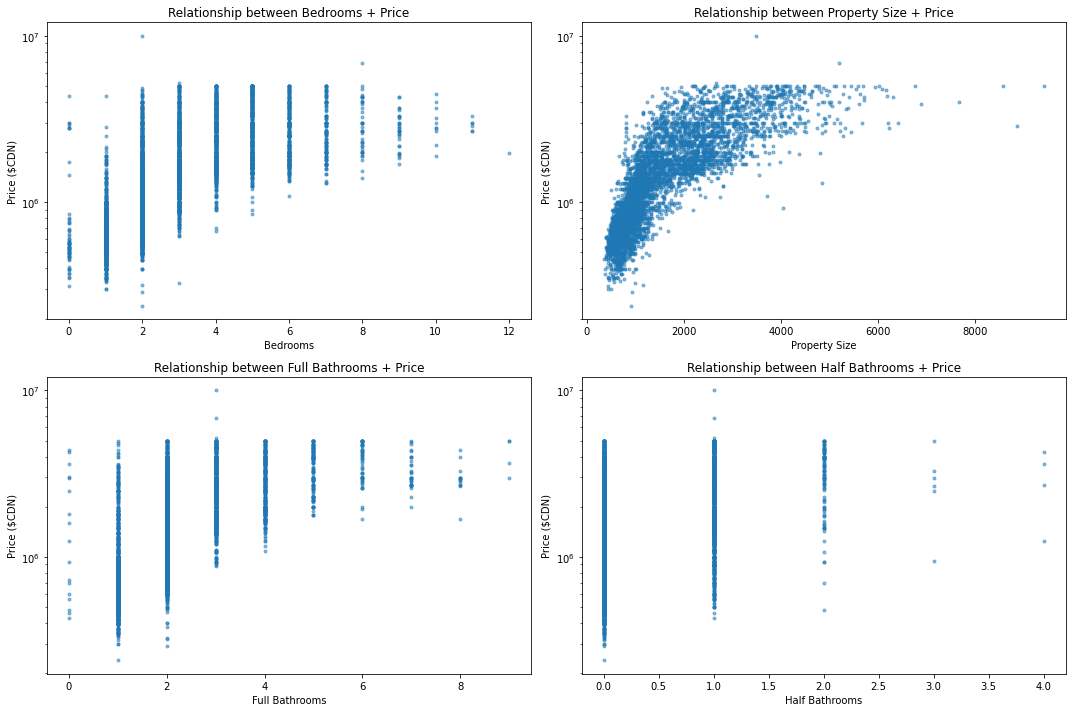

In [120]:
# List out all of the numerical features
num_features = ["Bedrooms", "Property Size", "Full Bathrooms", "Half Bathrooms"]

# Use subplots to plot out all of the scatterplots
plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(listings_df[col], listings_df["Price"], marker=".", alpha=0.5)
    plt.title(f"Relationship between {col} + Price")
    plt.xlabel(col)
    plt.ylabel("Price ($CDN)")
    plt.yscale("log")
plt.tight_layout()
plt.show()

As shown above, all numerical features seem to increase in price **on average** as the number of the features increase. This is unsurprising, as I can assume that the number of bathrooms and bedrooms are correlated with property size which we already know is at least somewhat related with the price of a property. Interestingly, properties cap in  value at five million dollars across different property sizes. Also, the average price of a property does not seem to dramatically differ above 4000 square feet. 